In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [76]:
df = pd.read_csv('sentiment_tweets.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [77]:
df.groupby('label (depression result)')['message to examine'].count()

label (depression result)
0    8000
1    2314
Name: message to examine, dtype: int64

In [78]:
positive = df[df['label (depression result)']==0]
positive.head(3)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0


In [79]:
negative = df[df['label (depression result)']==1]
negative.head(3)

,Index,message to examine,label (depression result)
8000,800000,The lack of this understanding is a small but ...,1
8001,800001,i just told my parents about my depression and...,1
8002,800002,depression is something i don't speak about ev...,1


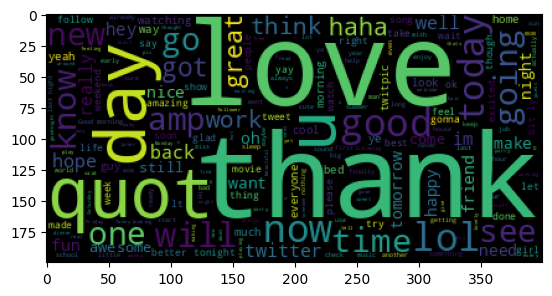

In [80]:
# turn all messages to a list
pos_list = positive['message to examine'].tolist()
# combine the positive list to a long string
pos_str=''.join(pos_list)
# visualize the positive string
plt.imshow(WordCloud().generate(pos_str))

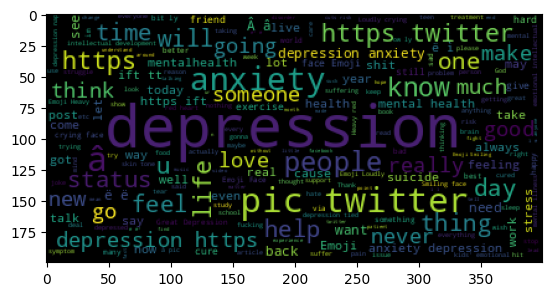

In [81]:
# turn all messages to a list
neg_list = negative['message to examine'].tolist()
# combine the negative list to a long string
neg_str=''.join(neg_list)
# visualize the negative string
plt.imshow(WordCloud().generate(neg_str))

Enhance them by removing stopwords(less important words) and puncatuations

In [82]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

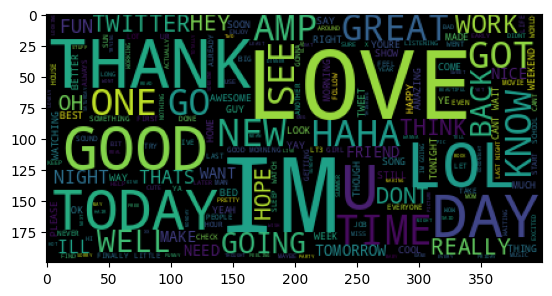

In [83]:
# combine the positive list to a long string and remove puntuation and stopwords(less important words)
pos_str = ' '.join(pos_list)
pos_str_wo_punc = ''.join([c for c in pos_str if c not in string.punctuation ])
pos_str_wo_punc_clean = ' '.join([w.upper() for w in pos_str_wo_punc.split() if w.lower() not in stopwords.words('english')])
# visualize the positive string
plt.imshow(WordCloud().generate(pos_str_wo_punc_clean))

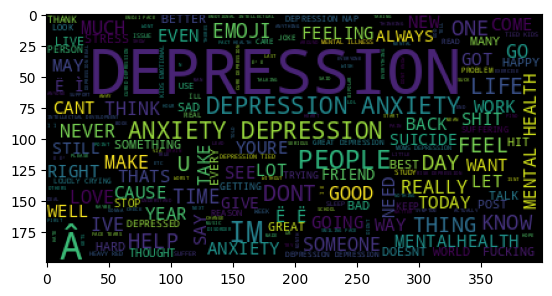

In [84]:
# combine the negative list to a long string and remove puntuation and stopwords(less important words)
neg_str = ' '.join(neg_list)
neg_str_wo_punc = ''.join([c for c in neg_str if c not in string.punctuation ])
neg_str_wo_punc_clean = ' '.join([w.upper() for w in neg_str_wo_punc.split() if w.lower() not in stopwords.words('english')])
# visualize the negative string
plt.imshow(WordCloud().generate(neg_str_wo_punc_clean))